In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

## Actuators - Installed

In [4]:
# Creating the data dictionary
data = {
    "Voltage": [5, 4.8, 4.6, 4.4, 4.2, 4, 3.8, 3.6, 3.4, 3.2, 3],
    "Flow Rate (LPH)": [390, 360, 340, 315, 280, 250, 220, 198, 165, 140, 125],
    "Delta P (mm Hg)": [125, 138, 155, 172, 196, 226, 232, 247, 267, 281, 288]
}

# Creating the DataFrame
df = pd.DataFrame(data)
df.head()

,Voltage,Flow Rate (LPH),Delta P (mm Hg)
0,5.0,390,125
1,4.8,360,138
2,4.6,340,155
3,4.4,315,172
4,4.2,280,196


In [5]:
df['Flow Rate (m3/s)'] = df['Flow Rate (LPH)']/1000/3600
df['Delta P (N/m2)'] = df['Delta P (mm Hg)']/10*1.01325e5/76

arr = []
for i in range(df.shape[0]):
    arr.append(round(df.iloc[i,0]/df.iloc[0,0],2))
df['Valve Open Fraction'] = pd.Series(arr)

arr = []
for i in range(df.shape[0]):
    arr.append(df.iloc[i,3]/df.iloc[0,3])
df['Flow Fraction'] = pd.Series(arr)

df.head()

,Voltage,Flow Rate (LPH),Delta P (mm Hg),Flow Rate (m3/s),Delta P (N/m2),Valve Open Fraction,Flow Fraction
0,5.0,390,125,0.000108,16665.296053,1.00,1.000000
1,4.8,360,138,0.000100,18398.486842,0.96,0.923077
2,4.6,340,155,0.000094,20664.967105,0.92,0.871795
3,4.4,315,172,0.000087,22931.447368,0.88,0.807692
4,4.2,280,196,0.000078,26131.184211,0.84,0.717949


In [6]:
rho = 1000
df['y'] = df['Flow Rate (m3/s)']*np.sqrt(rho/df['Delta P (N/m2)'])
df['lny'] = np.log(df['y'])
df.head()

,Voltage,Flow Rate (LPH),Delta P (mm Hg),Flow Rate (m3/s),Delta P (N/m2),Valve Open Fraction,Flow Fraction,y,lny
0,5.0,390,125,0.000108,16665.296053,1.00,1.000000,0.000027,-10.536962
1,4.8,360,138,0.000100,18398.486842,0.96,0.923077,0.000023,-10.666475
2,4.6,340,155,0.000094,20664.967105,0.92,0.871795,0.000021,-10.781719
3,4.4,315,172,0.000087,22931.447368,0.88,0.807692,0.000018,-10.910126
4,4.2,280,196,0.000078,26131.184211,0.84,0.717949,0.000015,-11.093219


a = {2.8074099169161312e-05}
b = {54.307872883908}
R2 = 0.9955646919663443


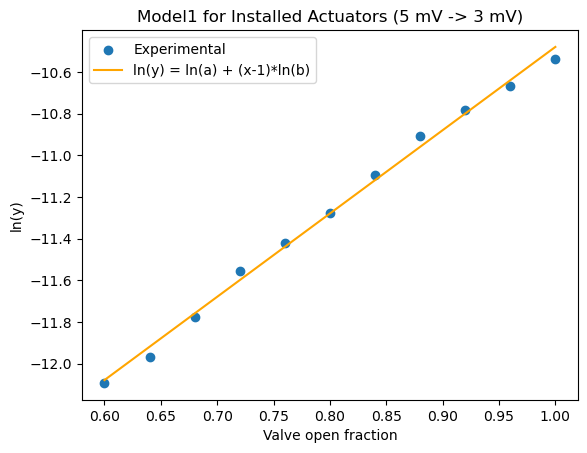

In [26]:
## Model 1 (5 mV -> 3 mV)
lny = np.asarray(df.iloc[:11,8])
x = np.asarray(df.iloc[:11,5])

A = np.polyfit(x,lny,1)
lnb = A[0]
lna = A[0]+A[1]

plt.scatter(x,lny)
plt.plot(x,lna+lnb*(x-1),'orange')
plt.legend(['Experimental','ln(y) = ln(a) + (x-1)*ln(b)'])
plt.xlabel('Valve open fraction')
plt.ylabel('ln(y)')
plt.title('Model1 for Installed Actuators (5 mV -> 3 mV)')

print(f'a =', {np.exp(lna)})
print(f'b =', {np.exp(lnb)})
print('R2 =', r2_score(lny,lna+lnb*(x-1)))

a = {2.6504588767792328e-05}
b = {3.1424515045881614}
R2 = 0.9974076615828985


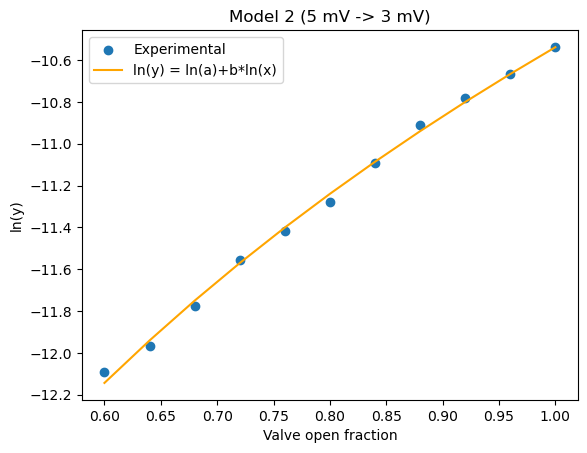

In [29]:
## Model 2 (5 mV -> 3 mV)
lny = np.asarray(df.iloc[:11,8])
y = np.asarray(df.iloc[:11,7])
x = np.asarray(df.iloc[:11,5])

A = np.polyfit(np.log(x), lny,1)
lna = A[1]
b = A[0]

plt.scatter(x,lny)
plt.plot(x,lna+b*np.log(x),'orange')
plt.legend(['Experimental','ln(y) = ln(a)+b*ln(x)'])
plt.xlabel('Valve open fraction')
plt.ylabel('ln(y)')
plt.title('Model 2 (5 mV -> 3 mV)')

print(f'a =', {np.exp(lna)})
print(f'b =', {b})
print('R2 =', r2_score(lny,lna+b*np.log(x)))

Text(0.5, 1.0, 'Actuators Installed Characteristics (5 mV -> 3 mV)')

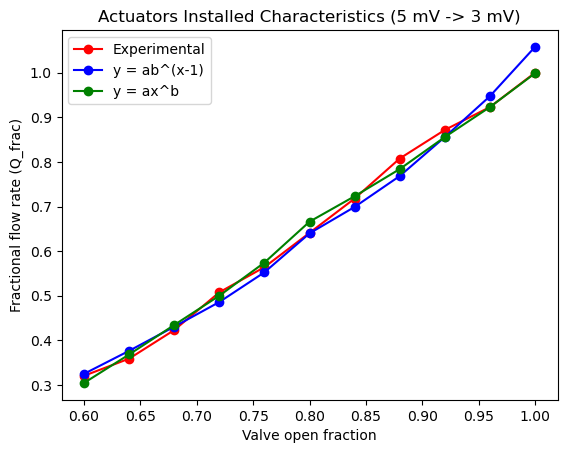

In [31]:
## Model Comparison (5 mV -> 3 mV)

lny = np.asarray(df.iloc[:11,8])
x = np.asarray(df.iloc[:11,5])
y = np.asarray(df.iloc[:11,7])/np.sqrt(rho/df.iloc[:11,4])/df.iloc[0,3]
plt.plot(x,y,marker='o',c='red')

A = np.polyfit(x,lny,1)
lnb = A[0]
lna = A[0]+A[1]
plt.plot(x,np.exp(lna)*np.exp(lnb)**(x-1)/np.sqrt(rho/df.iloc[:11,4])/df.iloc[0,3],marker='o',c='blue')

A = np.polyfit(np.log(x), lny,1)
lna = A[1]
b = A[0]
plt.plot(x,np.exp(lna)*x**b/np.sqrt(rho/df.iloc[:11,4])/df.iloc[0,3],marker='o',c='green')

plt.legend(['Experimental','y = ab^(x-1)','y = ax^b'])
plt.xlabel('Valve open fraction')
plt.ylabel('Fractional flow rate (Q_frac)')
plt.title('Actuators Installed Characteristics (5 mV -> 3 mV)')

### Actuators - Inherent

In [50]:
# Creating the updated data dictionary
data_updated = {
    "Voltage": [5, 4.8, 4.6, 4.4, 4.2, 4, 3.8, 3.6, 3.4, 3.2, 3, 5, 4.8, 4.6, 4.4, 4.2, 4, 3.8, 3.6, 3.4, 3.2, 3],
    "Flow Rate (LPH)": [385, 335, 290, 258, 215, 175, 145, 125, 110, 90, 70, 390, 345, 295, 260, 215, 185, 155, 130, 110, 90, 70],
    "Delta P (mm Hg)": [125] * 22
}

# Creating the DataFrame
df_updated = pd.DataFrame(data_updated)

df_updated
df = df_updated

In [51]:
df['Flow Rate (m3/s)'] = df['Flow Rate (LPH)']/1000/3600
df['Delta P (N/m2)'] = df['Delta P (mm Hg)']/10*1.01325e5/76

arr = []
for i in range(df.shape[0]):
    arr.append(round(df.iloc[i,0]/df.iloc[0,0],2))
df['Valve Open Fraction'] = pd.Series(arr)

arr = []
for i in range(df.shape[0]):
    arr.append(df.iloc[i,3]/df.iloc[0,3])
df['Flow Fraction'] = pd.Series(arr)

rho = 1000
df['y'] = df['Flow Rate (m3/s)']*np.sqrt(rho/df['Delta P (N/m2)'])
df['lny'] = np.log(df['y'])

df.head()

,Voltage,Flow Rate (LPH),Delta P (mm Hg),Flow Rate (m3/s),Delta P (N/m2),Valve Open Fraction,Flow Fraction,y,lny
0,5.0,385,125,0.000107,16665.296053,1.00,1.000000,0.000026,-10.549865
1,4.8,335,125,0.000093,16665.296053,0.96,0.870130,0.000023,-10.688978
2,4.6,290,125,0.000081,16665.296053,0.92,0.753247,0.000020,-10.833228
3,4.4,258,125,0.000072,16665.296053,0.88,0.670130,0.000018,-10.950149
4,4.2,215,125,0.000060,16665.296053,0.84,0.558442,0.000015,-11.132471


a = {2.7565219569409286e-05}
b = {67.48558306451253}
R2 = 0.9952033975791676


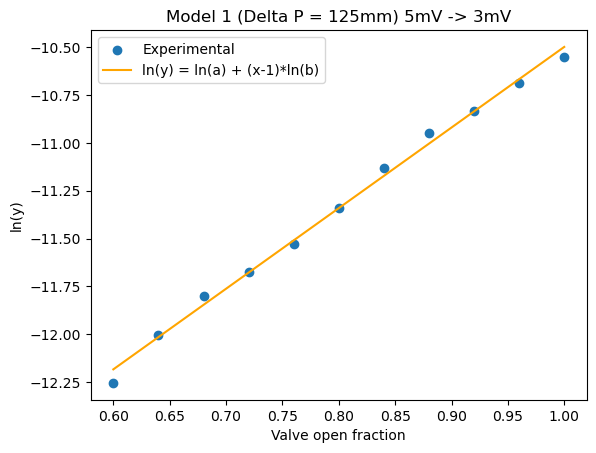

In [52]:
## Model 1 (Delta P = 85mm)
lny = np.asarray(df.iloc[:11,8]) # for iloc[:11,8] we are taking the first 11 rows and the 8th column with 11 being exclusive
x = np.asarray(df.iloc[:11,5])

A = np.polyfit(x,lny,1)
lnb = A[0]
lna = A[0]+A[1]

plt.scatter(x,lny)
plt.plot(x,lna+lnb*(x-1),'orange')
plt.legend(['Experimental','ln(y) = ln(a) + (x-1)*ln(b)'])
plt.xlabel('Valve open fraction')
plt.ylabel('ln(y)')
plt.title('Model 1 (Delta P = 125mm) 5mV -> 3mV')

print(f'a =', {np.exp(lna)})
print(f'b =', {np.exp(lnb)})
print('R2 =', r2_score(lny,lna+lnb*(x-1)))

In [53]:
x = np.asarray(df.iloc[11:,5]) 
x

array([1.  , 0.96, 0.92, 0.88, 0.84, 0.8 , 0.76, 0.72, 0.68, 0.64, 0.6 ])

In [54]:
lny = np.asarray(df.iloc[11:,8])
lny

array([-10.5369619 , -10.65956422, -10.81613329, -10.94242701,
       -11.13247061, -11.28275282, -11.45968352, -11.63557419,
       -11.80262828, -12.00329897, -12.2546134 ])

a = {2.8277169642701396e-05}
b = {69.09604100917014}
R2 = 0.9945175291734005


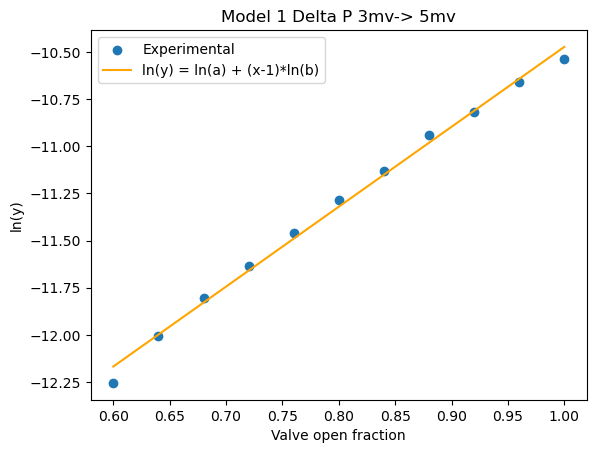

In [55]:
## Model 1 (Delta P = 125mm)
lny = np.asarray(df.iloc[11:,8])
x = np.asarray(df.iloc[11:,5]) # here x is the valve open fraction

A = np.polyfit(x,lny,1) # in polyfit, the first argument is the x-axis and the second argument is the y-axis and the third argument is the degree of the polynomial
lnb = A[0]
lna = A[0]+A[1]

plt.scatter(x,lny)
plt.plot(x,lna+lnb*(x-1),'orange')
plt.legend(['Experimental','ln(y) = ln(a) + (x-1)*ln(b)'])
plt.xlabel('Valve open fraction')
plt.ylabel('ln(y)')
plt.title('Model 1 Delta P 3mv-> 5mv')

print(f'a =', {np.exp(lna)})
print(f'b =', {np.exp(lnb)})
print('R2 =', r2_score(lny,lna+lnb*(x-1)))

a = {2.5942892072392274e-05}
b = {3.313354002643374}
R2 = 0.9970483714103959


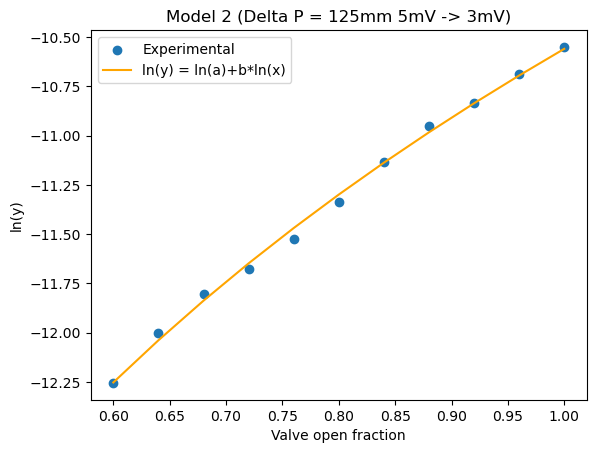

In [58]:
## Model 2 (Delta P = 85mm)
lny = np.asarray(df.iloc[:11,8])
y = np.asarray(df.iloc[:11,7])
x = np.asarray(df.iloc[:11,5])

A = np.polyfit(np.log(x), lny,1)
lna = A[1]
b = A[0]

plt.scatter(x,lny)
plt.plot(x,lna+b*np.log(x),'orange')
plt.legend(['Experimental','ln(y) = ln(a)+b*ln(x)'])
plt.xlabel('Valve open fraction')
plt.ylabel('ln(y)')
plt.title('Model 2 (Delta P = 125mm 5mV -> 3mV)')

print(f'a =', {np.exp(lna)})
print(f'b =', {b})
print('R2 =', r2_score(lny,lna+b*np.log(x)))

a = {2.663590001509451e-05}
b = {3.3370007525345255}
R2 = 0.9994104683232347


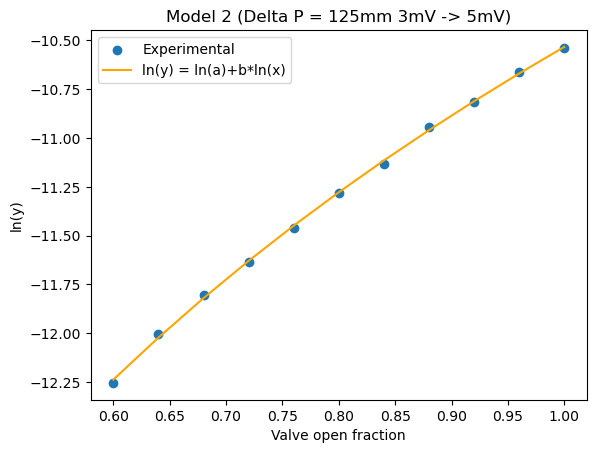

In [61]:
## Model 2 (Delta P = 92mm)
lny = np.asarray(df.iloc[11:,8])
y = np.asarray(df.iloc[11:,7])
x = np.asarray(df.iloc[11:,5])

A = np.polyfit(np.log(x), lny,1)
lna = A[1]
b = A[0]

plt.scatter(x,lny)
plt.plot(x,lna+b*np.log(x),'orange')
plt.legend(['Experimental','ln(y) = ln(a)+b*ln(x)'])
plt.xlabel('Valve open fraction')
plt.ylabel('ln(y)')
plt.title('Model 2 (Delta P = 125mm 3mV -> 5mV)')

print(f'a =', {np.exp(lna)})
print(f'b =', {b})
print('R2 =', r2_score(lny,lna+b*np.log(x)))

Text(0.5, 1.0, 'Actuators Inherent Characteristics (Delta P = 125mm)')

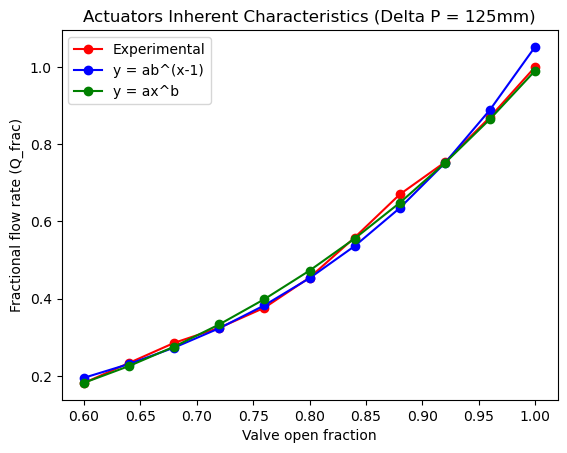

In [62]:
## Model Comparison (Delta P = 85mm)

lny = np.asarray(df.iloc[:11,8])
x = np.asarray(df.iloc[:11,5])
y = np.asarray(df.iloc[:11,7])/np.sqrt(rho/df.iloc[:11,4])/df.iloc[0,3]
plt.plot(x,y,marker='o',c='red')

A = np.polyfit(x,lny,1)
lnb = A[0]
lna = A[0]+A[1]
plt.plot(x,np.exp(lna)*np.exp(lnb)**(x-1)/np.sqrt(rho/df.iloc[:11,4])/df.iloc[0,3],marker='o',c='blue')

A = np.polyfit(np.log(x), lny,1)
lna = A[1]
b = A[0]
plt.plot(x,np.exp(lna)*x**b/np.sqrt(rho/df.iloc[:11,4])/df.iloc[0,3],marker='o',c='green')

plt.legend(['Experimental','y = ab^(x-1)','y = ax^b'])
plt.xlabel('Valve open fraction')
plt.ylabel('Fractional flow rate (Q_frac)')
plt.title('Actuators Inherent Characteristics (Delta P = 125mm)')

Text(0.5, 1.0, 'Actuators Inherent Characteristics (Delta P = 125mm) 3mV -> 5mV')

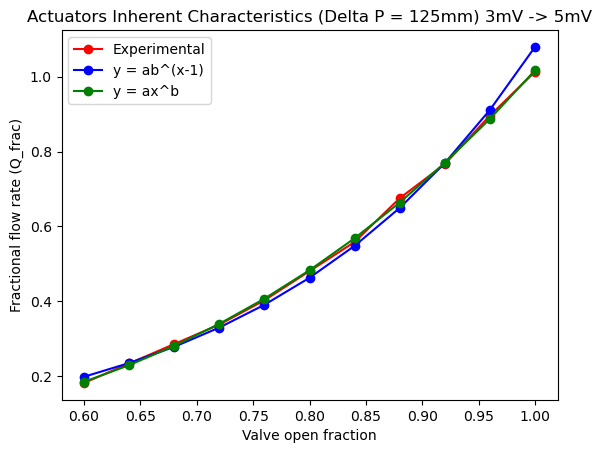

In [63]:
## Model Comparison (Delta P = 92mm)

lny = np.asarray(df.iloc[11:,8])
x = np.asarray(df.iloc[11:,5])
y = np.asarray(df.iloc[11:,7])/np.sqrt(rho/df.iloc[11:,4])/df.iloc[0,3]
plt.plot(x,y,marker='o',c='red')

A = np.polyfit(x,lny,1)
lnb = A[0]
lna = A[0]+A[1]
plt.plot(x,np.exp(lna)*np.exp(lnb)**(x-1)/np.sqrt(rho/df.iloc[11:,4])/df.iloc[0,3],marker='o',c='blue')

A = np.polyfit(np.log(x), lny,1)
lna = A[1]
b = A[0]
plt.plot(x,np.exp(lna)*x**b/np.sqrt(rho/df.iloc[11:,4])/df.iloc[0,3],marker='o',c='green')

plt.legend(['Experimental','y = ab^(x-1)','y = ax^b'])
plt.xlabel('Valve open fraction')
plt.ylabel('Fractional flow rate (Q_frac)')
plt.title('Actuators Inherent Characteristics (Delta P = 125mm) 3mV -> 5mV')